In [86]:
import numpy as np
import matplotlib.pyplot as plt
import gala
import gala.potential as gp
import gala.dynamics as gd

import sys
sys.path.append("../../bfe_integrator/src/bfe_tools/")
from read_coefficients import load_scf_coefficients
import astropy.units as u

In [2]:
!head  "../../../projects/bfe_computation/examples/runing_pipeline/BFE_LMC5_grav_MO3_simple_COM_host_snap_000.txt"

#  nmax: 20 
#  lmax: 20 
#  r_s: 25.20 
#  particle_mass:  2.334e-04 
#  rcom: [-0.07653799 -0.24870398 -0.00731361] 
#  vcom: [ 0.00804412 -0.00986541 -0.00110419]
2.001138716900506509e+01 7.552972632716473643e-03 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
-5.716918922962124783e-03 4.717819020691674768e-03 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
-1.135364624576867959e-01 9.472781381869356879e-03 -4.895604836905454449e-01 9.341445968245961143e-03 4.083864387479116891e-05
5.395071590270911904e-02 1.475613080482431061e-02 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00


In [44]:
# Read the expansion
path_to_coeff = "../../../projects/bfe_computation/examples/runing_pipeline/"
coeff_file = "BFE_LMC5_grav_MO3_simple_COM_host_snap_"

coeff = np.loadtxt(path_to_coeff + coeff_file + "030.txt")

print(np.shape(coeff))
pm = 2.334E-4 
nmax = 20
lmax = 20
mmax=20
r_s = 25.2

# re_shape_matrix 
print(coeff[0])

(4851, 5)
[1.99501324e+01 7.51396132e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [131]:
Ssmooth, Tsmooth = load_scf_coefficients(path_to_coeff + coeff_file + "030.txt", nmax, lmax, mmax, pm, sn=0)

../../bfe_integrator/src/bfe_tools/coefficients_smoothing.py:142: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [132]:
print("N coeffcients S: ", len(np.nonzero(Ssmooth)[0]), " N coeffcients T: ", len(np.nonzero(Tsmooth)[0]))

N coeffcients S:  4851  N coeffcients T:  4410


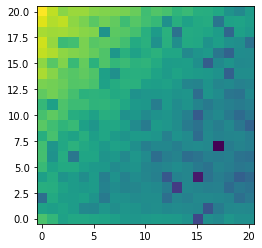

In [133]:
plt.imshow(np.log10(np.abs(Ssmooth[:,:,0].T)), origin='lower')

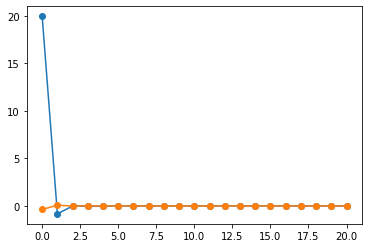

In [134]:
plt.plot(Ssmooth[:,0,0], '-o')
plt.plot(Tsmooth[:,1,1], '-o')
#plt.set_yscale('log')

In [135]:
# Make grid to compute the fields 

In [136]:
pot_scf = gp.SCFPotential(m=1E10, r_s=r_s,
                      Snlm=Ssmooth, Tnlm=Tsmooth, units=[u.kpc, u.Gyr, u.Msun, u.radian])

In [137]:
# plot BFE fields

Text(0, 0.5, '$z$')

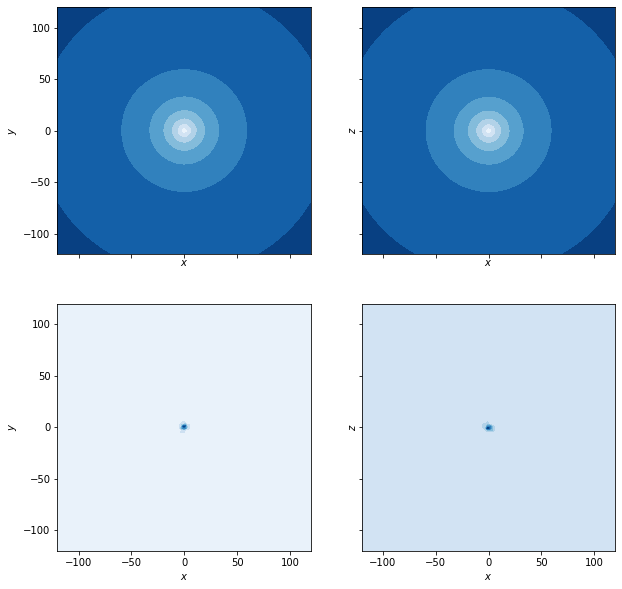

In [138]:
grid = np.linspace(-120, 120, 128)
fig, axes = plt.subplots(2, 2, figsize=(10, 10),
                         sharex=True, sharey=True)
_ = pot_scf.plot_contours((grid, grid, 0), ax=axes[0][0])

axes[0][0].set_xlabel('$x$')
axes[0][0].set_ylabel('$y$')

_ = pot_scf.plot_contours((grid, 0, grid), ax=axes[0][1])
axes[0][1].set_xlabel('$x$')
axes[0][1].set_ylabel('$z$')


_ = pot_scf.plot_density_contours((grid, grid, 0), ax=axes[1][0])

axes[1][0].set_xlabel('$x$')
axes[1][0].set_ylabel('$y$')

_ = pot_scf.plot_density_contours((grid, 0, grid), ax=axes[1][1])
axes[1][1].set_xlabel('$x$')
axes[1][1].set_ylabel('$z$')

In [127]:
# Integrate orbit

In [128]:
w0 = gd.PhaseSpacePosition(pos=[-50, 0, 0]*u.kpc,
                           vel=[0, -50, 0.0]*u.km/u.s)

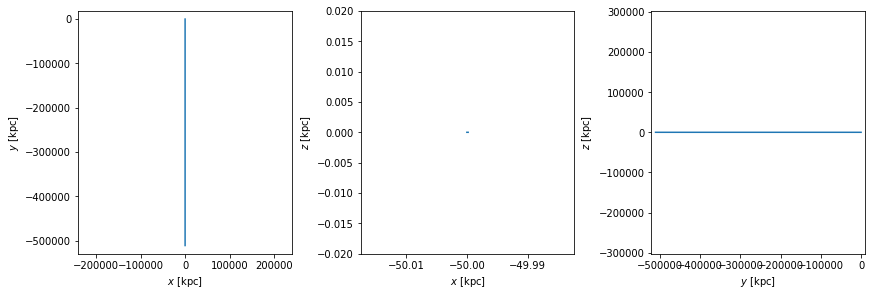

In [129]:
orbit_flat = pot_scf.integrate_orbit(w0, dt=2.*u.Gyr, n_steps=5000)
_ = orbit_flat.plot()